 # Survival on the Titanic 
### Predicting survival using pandas, seaborn & sklearn logistic regression

### Anthony Nicholas - 7 January 2018

### **Steps**
0. Introduction
1. Imports
2. First look at the data
3. Preparing the data:  
    A. Age  
    B. Sex  
    C. Passenger Class  
    D. Cabin  
    E. Family  
    F. Fare  
4. Define training & testing sets
5. Run logistic Regression
6. Get correlation coefficients
7. Generate Submission

## 0. Introduction

This is my first attempt at a Kaggle competition.  I have looked at and used ideas developed in the [notebook made by Omar El Gabry](http://www.kaggle.com/omarelgabry/a-journey-through-titanic) and the [R notebook put together by Megan Risdal](https://www.kaggle.com/mrisdal/exploring-survival-on-the-titanic) (both are excellent). My approach below uses many of the ideas/approaches they developed.

We know from the problem introduction that 1502 out of 2224 passengers died; that insufficient lifeboats was a major factor; and that some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## 1. Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression

#get titanic and test csv files and insert into Dataframes
titanic_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
sample_submission_df = pd.read_csv("../input/gender_submission.csv")



## 2. First look at data

In [2]:
#titanic_df.head(50)

first_class_titanic_df = titanic_df[titanic_df['Pclass'] == 3]
first_class_titanic_df.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [3]:
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_df['Pclass'].value_counts()
#print(count_nan_cabin_titanic)


3    491
1    216
2    184
Name: Pclass, dtype: int64

<a name="imports"></a>

In [5]:
#Drop PassengerId, Name and Ticket as not useful
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Embarked'], axis=1)

## 3A. Cleanse & investigate Age data

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


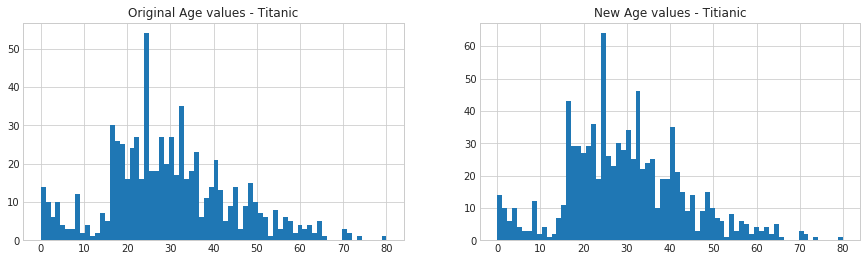

In [6]:
#Create plots to investigate age distribution on Titanic
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titianic')

# Plot of ages in original form - but titanic_df has 177 NA's (out of 714 records in total).  
# Test_df has 86 NA's of 332.
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

#There are a lot of NA's.  Replace these with random values between (mean - std) and (mean + std)

#get average, std for titanic_df and test_df
average_age_titanic = titanic_df["Age"].mean()
std_age_titanic = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

#generate random numbers to replace NaN's with
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

#fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

#convert from float to int
titanic_df["Age"] = titanic_df["Age"].astype(int)
test_df["Age"] = test_df["Age"].astype(int)

#Plot amended age values 
titanic_df['Age'].hist(bins=70, ax=axis2)

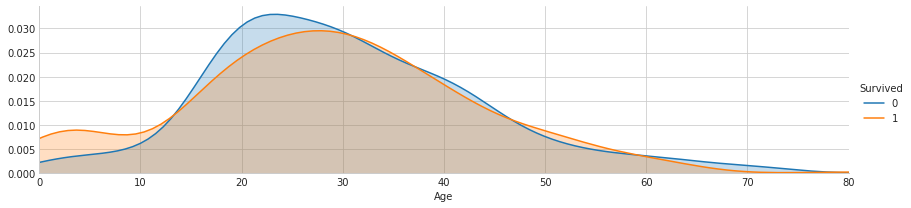

In [7]:
#Plot of age vs survival shows that children <15 yo have higher rates of survival 

facet = sns.FacetGrid(titanic_df, hue = "Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

## 3B. Sex

In [8]:
# Children have high rates of survival.  Create new column 'Person' which classifies
# passengers as male, female or child.
def get_person(passenger):
    age,sex,pclass = passenger
    if (pclass == 1 or pclass == 2) and age < 16:
        return 'rich_child'
    elif (pclass == 1 or pclass == 2) and sex == 'female':
        return 'rich_female'    
    elif age < 16:
        return 'child'
    elif sex == 'female':
        return 'female'
    else:
        return 'male'
        
titanic_df['Person'] = titanic_df[['Age', 'Sex', 'Pclass']].apply(get_person,axis=1)
test_df['Person'] = test_df[['Age', 'Sex', 'Pclass']].apply(get_person,axis=1)

# Drop Sex column - no longer needed
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

In [9]:
titanic_df.head(40)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Person
0,0,3,22,1,0,7.2500,NaN,male
1,1,1,38,1,0,71.2833,C85,rich_female
2,1,3,26,0,0,7.9250,NaN,female
3,1,1,35,1,0,53.1000,C123,rich_female
4,0,3,35,0,0,8.0500,NaN,male
5,0,3,16,0,0,8.4583,NaN,male
6,0,1,54,0,0,51.8625,E46,male
7,0,3,2,3,1,21.0750,NaN,child
8,1,3,27,0,2,11.1333,NaN,female
9,1,2,14,1,0,30.0708,NaN,rich_child


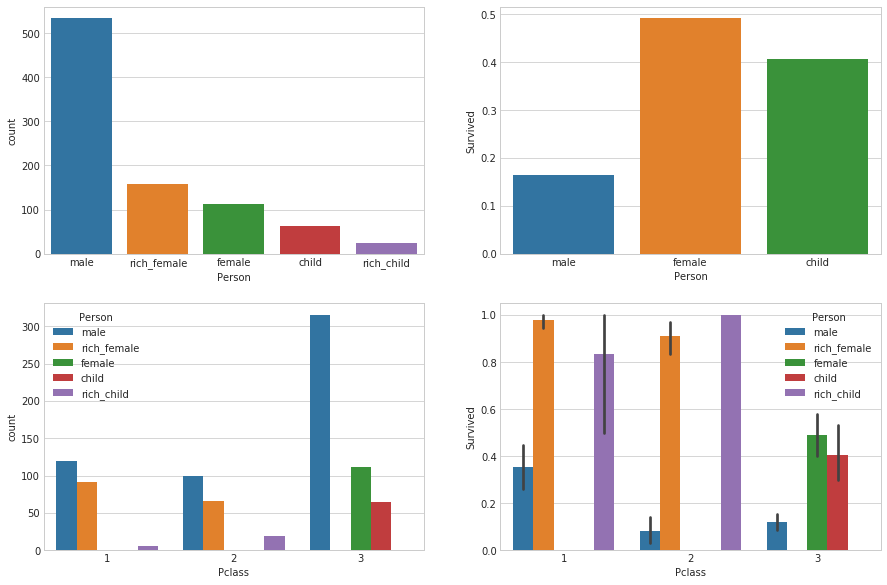

In [10]:
# Look at survival rates for women and children vs men by class.

fig, axes = plt.subplots(2,2,figsize=(15,10))

sns.countplot(x='Person', data=titanic_df, ax=axes[0,0])

person_perc = titanic_df[["Person", "Survived"]].groupby(["Person"], as_index=False).mean()
sns.barplot(x="Person", y="Survived", data=person_perc, ax=axes[0,1], order=['male', 'female', 'child'])
sns.countplot(x='Pclass', hue='Person', data=titanic_df, ax=axes[1,0])
sns.barplot(x='Pclass', y="Survived", hue='Person', data=titanic_df, ax=axes[1,1])



In [11]:
#Create dummy variable for Person column & drop male (as child & female columns imply whether male)

person_dummies_titanic = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Rich_Child', 'Rich_Female','Child', 'Female', 'Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Rich_Child', 'Rich_Female','Child', 'Female', 'Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df = test_df.join(person_dummies_test)

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

titanic_df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Rich_Child,Rich_Female,Child,Female
0,0,3,22,1,0,7.2500,NaN,0,0,1,0
1,1,1,38,1,0,71.2833,C85,0,0,0,0
2,1,3,26,0,0,7.9250,NaN,0,1,0,0
3,1,1,35,1,0,53.1000,C123,0,0,0,0
4,0,3,35,0,0,8.0500,NaN,0,0,1,0


## 3C. Cleanse & investigate Passenger Class data

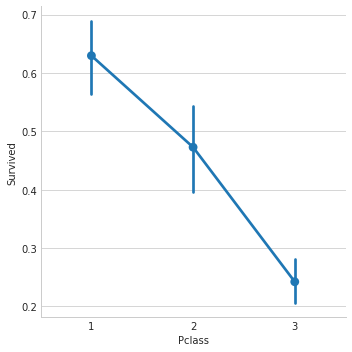

In [12]:
# PASSENGER CLASS (Pclass)

#Plot Pclass vs chance of survival
sns.factorplot('Pclass', 'Survived', order=[1,2,3], data=titanic_df, size=5)

#Create dummies for Pclass and then drop third class
pclass_dummies_titanic = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_test.columns = ['Class_1', 'Class_2', 'Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df = test_df.join(pclass_dummies_titanic)


In [13]:
titanic_df.head(5)

,Survived,Age,SibSp,Parch,Fare,Cabin,Rich_Child,Rich_Female,Child,Female,Class_1,Class_2
0,0,22,1,0,7.2500,NaN,0,0,1,0,0,0
1,1,38,1,0,71.2833,C85,0,0,0,0,1,0
2,1,26,0,0,7.9250,NaN,0,1,0,0,0,0
3,1,35,1,0,53.1000,C123,0,0,0,0,1,0
4,0,35,0,0,8.0500,NaN,0,0,1,0,0,0


## 3D. Cleanse & investigate Cabin data

![blueprint of the titanic](http://au.rrforums.net/forum/messages/16947/26124.jpg)

From Wikimedia commons image at https://upload.wikimedia.org/wikipedia/commons/5/5d/Titanic_side_plan_annotated_English.png

In [14]:
#CABIN

# Replace NaN with 0.
# count_nan_cabin_titanic = titanic_df['Cabin'].isnull().sum()
# print(count_nan_cabin_titanic)
titanic_df['Cabin'].fillna(value=0, inplace=True)
test_df['Cabin'].fillna(value=0, inplace=True)


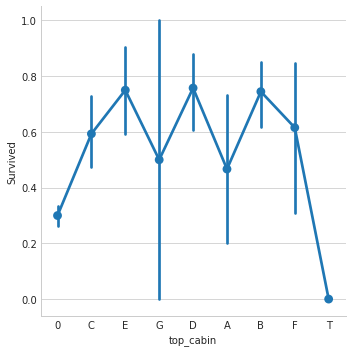

In [15]:
titanic_df['top_cabin'] = titanic_df['Cabin'].astype(str).str[0]
sns.factorplot('top_cabin', 'Survived', data=titanic_df, size=5)
#sns.countplot(x='top_cabin', data=titanic_df)



In [16]:
a_deck_df = titanic_df[titanic_df['top_cabin'] == 'A']
a_deck_df.head(40)

,Survived,Age,SibSp,Parch,Fare,Cabin,Rich_Child,Rich_Female,Child,Female,Class_1,Class_2,top_cabin
23,1,28,0,0,35.5000,A6,0,0,1,0,1,0,A
96,0,71,0,0,34.6542,A5,0,0,1,0,1,0,A
174,0,56,0,0,30.6958,A7,0,0,1,0,1,0,A
185,0,20,0,0,50.0000,A32,0,0,1,0,1,0,A
209,1,40,0,0,31.0000,A31,0,0,1,0,1,0,A
284,0,24,0,0,26.0000,A19,0,0,1,0,1,0,A
445,1,4,0,2,81.8583,A34,0,0,0,1,1,0,A
475,0,42,0,0,52.0000,A14,0,0,1,0,1,0,A
556,1,48,1,0,39.6000,A16,0,0,0,0,1,0,A
583,0,36,0,0,40.1250,A10,0,0,1,0,1,0,A


In [17]:

# Passengers who had cabins at the top of the ship may have been more likely to survive than
# those who were further below.  Create column for top_cabin Location.  If passenger had cabin 
# at top of ship (ie decks A, B or C) give value 1, else 0. 

titanic_df['top_cabin'] = titanic_df['Cabin'].astype(str).str[0]
titanic_df['top_cabin'] = titanic_df['top_cabin'].map({'A': 1, 'B': 1, 'C': 1})
titanic_df['top_cabin'][titanic_df['top_cabin'] != 1] = 0
titanic_df['top_cabin'] = titanic_df['top_cabin'].astype(np.int64)

test_df['top_cabin'] = test_df['Cabin'].astype(str).str[0]
test_df['top_cabin'] = test_df['top_cabin'].map({'A': 1, 'B': 1, 'C': 1})
test_df['top_cabin'][test_df['top_cabin'] != 1] = 0
test_df['top_cabin'] = test_df['top_cabin'].astype(np.int64)

titanic_df.drop(['Cabin'],axis=1,inplace=True)
test_df.drop(['Cabin'],axis=1,inplace=True)

titanic_df.drop(['top_cabin'],axis=1,inplace=True)
test_df.drop(['top_cabin'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [18]:
titanic_df.head(5)

,Survived,Age,SibSp,Parch,Fare,Rich_Child,Rich_Female,Child,Female,Class_1,Class_2
0,0,22,1,0,7.2500,0,0,1,0,0,0
1,1,38,1,0,71.2833,0,0,0,0,1,0
2,1,26,0,0,7.9250,0,1,0,0,0,0
3,1,35,1,0,53.1000,0,0,0,0,1,0
4,0,35,0,0,8.0500,0,0,1,0,0,0


## 3E. Cleanse & investigate Family data

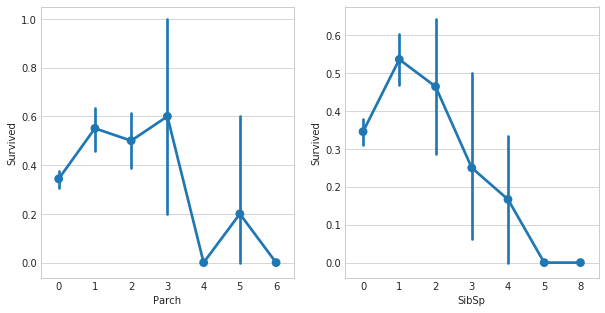

In [19]:
#FAMILY

# We have seen there was a v large number of men in 3rd class.  
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.pointplot('Parch', 'Survived', data=titanic_df, ax=axis1)
sns.pointplot('SibSp', 'Survived', data=titanic_df, ax=axis2)

#sns.factorplot('Parch', data=titanic_df, ax=axis1)
# sns.factorplot('SibSp', 'Survived', data=titanic_df, ax=axis2)

In [20]:
#Husbands in first or second class with wife on board

# Expect that husbands may have been allowed on board to accompany their wives.

def is_husband(passenger):
    child, female, class_1, class_2, sibsp = passenger
    if (child == 0 and female == 0) and (class_1 == 1) and sibsp >= 1:
        return 1
    else: 
        return 0

titanic_df['Rich_man_travelling_w_wife'] = titanic_df[['Child', 'Female','Class_1', 'Class_2', 'SibSp']].apply(is_husband,axis=1)
test_df['Rich_man_travelling_w_wife'] = test_df[['Child', 'Female','Class_1', 'Class_2','SibSp']].apply(is_husband,axis=1)

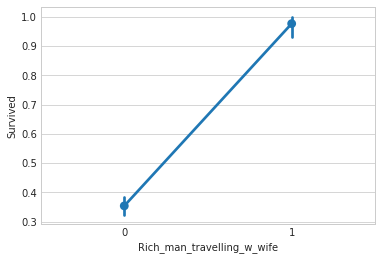

In [21]:
sns.pointplot('Rich_man_travelling_w_wife', 'Survived', data=titanic_df)

In [22]:
titanic_df.head(5)

,Survived,Age,SibSp,Parch,Fare,Rich_Child,Rich_Female,Child,Female,Class_1,Class_2,Rich_man_travelling_w_wife
0,0,22,1,0,7.2500,0,0,1,0,0,0,0
1,1,38,1,0,71.2833,0,0,0,0,1,0,1
2,1,26,0,0,7.9250,0,1,0,0,0,0,0
3,1,35,1,0,53.1000,0,0,0,0,1,0,1
4,0,35,0,0,8.0500,0,0,1,0,0,0,0


In [23]:
#Find parents with children onboard

# Expect that children were favoured and parents of those children may have been more likely 
# to survive.  Create column child_or_accomp which is 1 if parch >= 1 and 0 otherwise.

def get_parent_of_child(passenger):
    parch,age = passenger
    return 1 if age > 18 and parch >= 1 else 0

titanic_df['parent_of_child'] = titanic_df[['Parch', 'Age']].apply(get_parent_of_child,axis=1)
test_df['parent_of_child'] = test_df[['Parch', 'Age']].apply(get_parent_of_child,axis=1)

#Drop 
titanic_df.drop(['Parch'],axis=1,inplace=True)
titanic_df.drop(['SibSp'],axis=1,inplace=True)
test_df.drop(['Parch'],axis=1,inplace=True)
test_df.drop(['SibSp'],axis=1,inplace=True)

titanic_df.drop(['parent_of_child'],axis=1,inplace=True)
test_df.drop(['parent_of_child'],axis=1,inplace=True)

In [24]:
#fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

#sns.pointplot('parent_of_child', 'Survived', data=titanic_df, ax=axis1)

## 3F. Cleanse & investigate Fare data

In [25]:
#FARE

#One missing value in test_df - fill with median value
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

titanic_df["Fare"] = titanic_df['Fare'].astype(int)
test_df["Fare"] = test_df['Fare'].astype(int)

In [26]:
titanic_df.head(5)

,Survived,Age,Fare,Rich_Child,Rich_Female,Child,Female,Class_1,Class_2,Rich_man_travelling_w_wife
0,0,22,7,0,0,1,0,0,0,0
1,1,38,71,0,0,0,0,1,0,1
2,1,26,7,0,1,0,0,0,0,0
3,1,35,53,0,0,0,0,1,0,1
4,0,35,8,0,0,1,0,0,0,0


## 4. Define training & testing sets

In [27]:
X_train = titanic_df.drop("Survived", axis=1)
Y_train = titanic_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [28]:
X_test.head(5)

,Age,Fare,Rich_Child,Rich_Female,Child,Female,Class_1,Class_2,Rich_man_travelling_w_wife
0,34,7,0,0,1,0,0,0,0
1,47,7,0,1,0,0,1,0,1
2,62,9,0,0,1,0,0,0,0
3,27,8,0,0,1,0,1,0,0
4,22,12,0,1,0,0,0,0,0


## 5. Run logistic Regression

In [29]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.80695847362514028

## 6. Get correlation coefficients

In [30]:
#Get Correlation Coefficient for each feature using logistic regression

coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = pd.Series(logreg.coef_[0])

coeff_df



,Features,Coefficient Estimate
0,Age,-0.009435
1,Fare,0.000493
2,Rich_Child,-1.765661
3,Rich_Female,-1.295389
4,Child,-3.362985
5,Female,0.619557
6,Class_1,1.535164
7,Class_2,0.329190
8,Rich_man_travelling_w_wife,0.514326


## 7. Generate Submission

In [31]:
Submission = pd.DataFrame({"PassengerId":test_df["PassengerId"], "Survived": Y_pred })
Submission.to_csv('titanic.csv', index=False)